In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import optuna

C:\Users\HALONZO\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
presegmento = 2

In [3]:
df_train =  pd.read_csv('df_train_t_plusCluster.csv')
df_test = pd.read_csv('df_test_t_plusCluster.csv')
df_oot = pd.read_csv('df_oot_t_plusCluster.csv')
df_gris = pd.read_csv('df_gris_t_plusCluster.csv')

In [4]:
df_train.shape, df_test.shape, df_oot.shape, df_gris.shape

((250224, 132), (83408, 132), (229136, 132), (311515, 132))

In [5]:
df_train[['INGRESONETOTARGET_PROMULT03M','INGRESO_PLD']].sample(2)

,INGRESONETOTARGET_PROMULT03M,INGRESO_PLD
57233,3074.530029,1494.195217
53909,2959.083783,6243.252193


In [6]:
df_train['error'] = df_train['INGRESONETOTARGET_PROMULT03M'] - df_train['INGRESO_PLD']
df_test['error'] = df_test['INGRESONETOTARGET_PROMULT03M'] - df_test['INGRESO_PLD']
df_oot['error'] = df_oot['INGRESONETOTARGET_PROMULT03M'] - df_oot['INGRESO_PLD']
df_gris['error'] = df_gris['INGRESONETOTARGET_PROMULT03M'] - df_gris['INGRESO_PLD']

In [7]:
df_train[['INGRESONETOTARGET_PROMULT03M','INGRESO_PLD','error']].sample(2)

,INGRESONETOTARGET_PROMULT03M,INGRESO_PLD,error
61628,2506.418167,1697.000000,809.418167
18040,2864.709961,1539.114874,1325.595087


In [8]:
noPredictora = ['ESTRATO_woe4k','PROVINCIADISTRITO_woe4k',
       'GRUPO_DEPARTAMENTO_woe4k', 'INSTITUCION_PREGRADO_woe4k',
       'GRUPO_UNIVERSIDAD_PRESTIGIO_woe4k', 'CARRERA_PREGRADOHOMOLOGADA_woe4k',
       'GRUPO_CARRERA_PREGRADOHOMOLOGADA_woe4k', 'PRESEGMENTO_woe4k',
       'SEGMENTO_woe4k', 'ESTRATO_woe8k', 'PROVINCIADISTRITO_woe8k',
       'GRUPO_DEPARTAMENTO_woe8k', 'INSTITUCION_PREGRADO_woe8k',
       'GRUPO_UNIVERSIDAD_PRESTIGIO_woe8k', 'CARRERA_PREGRADOHOMOLOGADA_woe8k',
       'GRUPO_CARRERA_PREGRADOHOMOLOGADA_woe8k', 'PRESEGMENTO_woe8k',
       'SEGMENTO_woe8k','PESOVIVIENDA',
       'PESOPROPIEDADES', 'PESOUNIVERSIDAD', 'PESOCARRERA',
       'PESOEXPERIENCIAPROFESIONAL',
       'PERIODO', 'COD_DNI','PROVINCIADISTRITO',
       'INGRESONETOTARGET_ULT01M', 'INGRESONETOTARGET_PROMULT03M',
       'MESESCONINGRESOS', 'FLG_ATIPICO','INSTITUCION_PREGRADO','CARRERA_PREGRADOHOMOLOGADA',
       'MARCAANALISIS',
       'SEGMENTO','flg_4k', 'flg_8k',
       'error',
       'NRO_INMUEBLES_normalized',
       'SALDOPROPIEDAD_MAX_normalized', 'SALDOHIPOTECARIO_MAX_normalized',
       'PRECIOPROMEDIOINMUEBLE_normalized',
       'EXPERIENCIAPROFESIONALENCOSECHA_normalized',
       'INGRESOMICARRERA_normalized', 'EDADENCOSECHA_normalized',
       'INGRESO_PLD_normalized', 'ESTRATO_target_normalized',
       'PROVINCIADISTRITO_target_normalized',
       'GRUPO_DEPARTAMENTO_target_normalized',
       'INSTITUCION_PREGRADO_target_normalized',
       'GRUPO_UNIVERSIDAD_PRESTIGIO_target_normalized',
       'CARRERA_PREGRADOHOMOLOGADA_target_normalized',
       'GRUPO_CARRERA_PREGRADOHOMOLOGADA_target_normalized',
       'PRESEGMENTO_target_normalized', 'SEGMENTO_target_normalized',
       'PESOVIVIENDA_normalized', 'PESOPROPIEDADES_normalized',
       'PESOUNIVERSIDAD_normalized', 'PESOCARRERA_normalized',
       'PESOEXPERIENCIAPROFESIONAL_normalized', 'NRO_INMUEBLES_standardized',
       'SALDOPROPIEDAD_MAX_standardized', 'SALDOHIPOTECARIO_MAX_standardized',
       'PRECIOPROMEDIOINMUEBLE_standardized',
       'EXPERIENCIAPROFESIONALENCOSECHA_standardized',
       'INGRESOMICARRERA_standardized', 'EDADENCOSECHA_standardized',
       'INGRESO_PLD_standardized', 'ESTRATO_target_standardized',
       'PROVINCIADISTRITO_target_standardized',
       'GRUPO_DEPARTAMENTO_target_standardized',
       'INSTITUCION_PREGRADO_target_standardized',
       'GRUPO_UNIVERSIDAD_PRESTIGIO_target_standardized',
       'CARRERA_PREGRADOHOMOLOGADA_target_standardized',
       'GRUPO_CARRERA_PREGRADOHOMOLOGADA_target_standardized',
       'PRESEGMENTO_target_standardized', 'SEGMENTO_target_standardized',
       'PESOVIVIENDA_standardized', 'PESOPROPIEDADES_standardized',
       'PESOUNIVERSIDAD_standardized', 'PESOCARRERA_standardized',
       'PESOEXPERIENCIAPROFESIONAL_standardized'
       ]

target = ['error']

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df_train = df_train[(df_train['INGRESO_PLD'] < 8000)].reset_index(drop=True)
df_test = df_test[(df_test['INGRESO_PLD'] < 8000)].reset_index(drop=True)
df_oot = df_oot[(df_oot['INGRESO_PLD'] < 8000)].reset_index(drop=True)
df_gris = df_gris[(df_gris['INGRESO_PLD'] < 8000)].reset_index(drop=True)

In [11]:
df_train = df_train[(df_train['PRESEGMENTO'] == presegmento)].reset_index(drop=True)
df_test = df_test[(df_test['PRESEGMENTO'] == presegmento)].reset_index(drop=True)
df_oot = df_oot[(df_oot['PRESEGMENTO'] == presegmento)].reset_index(drop=True)
df_gris = df_gris[(df_gris['PRESEGMENTO'] == presegmento)].reset_index(drop=True)

df_train.shape, df_test.shape, df_oot.shape, df_gris.shape

((66386, 133), (22166, 133), (60160, 133), (83998, 133))

In [12]:
#seleccionas el complemento de las columnas noConsiderar de df_train
X_train = df_train.drop(columns=noPredictora)
y_train = df_train[target]
X_test = df_test.drop(columns=noPredictora)
y_test = df_test[target]
X_oot = df_oot.drop(columns=noPredictora)
y_oot = df_oot[target]
X_gris = df_gris.drop(columns=noPredictora)
y_gris = df_gris[target]
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_oot.shape, y_oot.shape, X_gris.shape, y_gris.shape

((66386, 52),
 (66386, 1),
 (22166, 52),
 (22166, 1),
 (60160, 52),
 (60160, 1),
 (83998, 52),
 (83998, 1))

In [13]:
X_train.sample(2)

,FLG_INMUEBLE,NRO_INMUEBLES,SALDOPROPIEDAD_MAX,SALDOHIPOTECARIO_MAX,ESTRATO,FLG_ESTRATO5,FLG_ESTRATO4,FLG_ESTRATO3,FLG_ESTRATO2,FLG_ESTRATO1,FLG_LIMAMODERNA,GRUPO_DEPARTAMENTO,FLG_GRUPO_DEPARTAMENTO5,FLG_GRUPO_DEPARTAMENTO4,FLG_GRUPO_DEPARTAMENTO3,FLG_GRUPO_DEPARTAMENTO2,FLG_GRUPO_DEPARTAMENTO1,FLG_LIMACALLAO,PRECIOPROMEDIOINMUEBLE,FLG_CONSULTADOSUNEDU,FLG_REPRESENTANTELEGAL,FLG_SUNEDU,GRUPO_UNIVERSIDAD_PRESTIGIO,FLG_GRUPO_UNIVERSIDAD_PRESTIGIO5,FLG_GRUPO_UNIVERSIDAD_PRESTIGIO4,FLG_GRUPO_UNIVERSIDAD_PRESTIGIO3,FLG_GRUPO_UNIVERSIDAD_PRESTIGIO2,FLG_GRUPO_UNIVERSIDAD_PRESTIGIO1,FLG_MAESTRIA,FLG_ESPECIALIZACION,EXPERIENCIAPROFESIONALENCOSECHA,GRUPO_CARRERA_PREGRADOHOMOLOGADA,FLG_GRUPO_CARRERA_PREGRADOHOMOLOGADA5,FLG_GRUPO_CARRERA_PREGRADOHOMOLOGADA4,FLG_GRUPO_CARRERA_PREGRADOHOMOLOGADA3,FLG_GRUPO_CARRERA_PREGRADOHOMOLOGADA2,FLG_GRUPO_CARRERA_PREGRADOHOMOLOGADA1,INGRESOMICARRERA,EDADENCOSECHA,INGRESO_PLD,PRESEGMENTO,FLG_SOLOSIS,ESTRATO_target,PROVINCIADISTRITO_target,GRUPO_DEPARTAMENTO_target,INSTITUCION_PREGRADO_target,GRUPO_UNIVERSIDAD_PRESTIGIO_target,CARRERA_PREGRADOHOMOLOGADA_target,GRUPO_CARRERA_PREGRADOHOMOLOGADA_target,PRESEGMENTO_target,SEGMENTO_target,cluster_kmeans
14751,1,1,0.0,0.0,5,1,0,0,0,0,0,3,0,0,1,0,0,0,1068.750000,1,0,1,3,0,0,1,0,0,1,1,10.0,2,0,0,0,1,0,3803.0,49,1634.352315,2,0.0,4515.749760,4218.694777,3842.030999,4475.502167,4406.261928,5278.128612,4705.172185,4630.283303,4274.639484,2
49428,1,2,0.0,0.0,4,0,1,0,0,0,0,5,1,0,0,0,0,1,1174.041667,1,0,1,4,0,1,0,0,0,0,1,28.0,2,0,0,0,1,0,3861.0,52,4365.127127,2,0.0,4017.533258,4221.078403,4298.482888,4777.484603,4558.235236,5278.128612,4705.172185,4630.283303,4274.639484,2


In [15]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 200)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 200)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 0.05)

    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        splitter=splitter,
        ccp_alpha=ccp_alpha,
        random_state=42
    )
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    rmse = np.mean(np.sqrt(-scores))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Mejores hiperparámetros:", study.best_params)
print("Mejor CV RMSE:", study.best_value)

[I 2025-05-24 10:20:22,149] A new study created in memory with name: no-name-1162e1cc-bcbe-4208-a76f-847e8accabb9
[I 2025-05-24 10:20:23,012] Trial 0 finished with value: 1827.7346443458737 and parameters: {'max_depth': 6, 'min_samples_split': 88, 'min_samples_leaf': 58, 'max_features': None, 'splitter': 'random', 'ccp_alpha': 0.043585133629936344}. Best is trial 0 with value: 1827.7346443458737.
[I 2025-05-24 10:20:24,909] Trial 1 finished with value: 1737.5383881022778 and parameters: {'max_depth': 16, 'min_samples_split': 83, 'min_samples_leaf': 51, 'max_features': None, 'splitter': 'best', 'ccp_alpha': 0.04485214124933862}. Best is trial 1 with value: 1737.5383881022778.
[I 2025-05-24 10:20:25,296] Trial 2 finished with value: 1984.734436609635 and parameters: {'max_depth': 3, 'min_samples_split': 126, 'min_samples_leaf': 9, 'max_features': None, 'splitter': 'random', 'ccp_alpha': 0.006917295167929261}. Best is trial 1 with value: 1737.5383881022778.
[I 2025-05-24 10:20:25,764] Tri

Mejores hiperparámetros: {'max_depth': 19, 'min_samples_split': 75, 'min_samples_leaf': 103, 'max_features': None, 'splitter': 'best', 'ccp_alpha': 0.03468525471450675}
Mejor CV RMSE: 1724.7924925823118


In [16]:
cart = DecisionTreeRegressor(random_state=42, max_depth=19, min_samples_split=75, min_samples_leaf=103, max_features=None, splitter='best', ccp_alpha=0.03468525471450675)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(cart, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
print(f"CV RMSE: {np.mean(np.sqrt(-cv_scores)):.2f} ± {np.std(np.sqrt(-cv_scores)):.2f}")

CV RMSE: 1724.79 ± 15.54


In [17]:
cart.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.03468525471450675, max_depth=19,
                      min_samples_leaf=103, min_samples_split=75,
                      random_state=42)

In [18]:
error_pred_train = cart.predict(X_train)
error_pred_test = cart.predict(X_test)
error_pred_oot = cart.predict(X_oot)
error_pred_gris = cart.predict(X_gris)

In [19]:
df_train['error_pred'] = error_pred_train
df_test['error_pred'] = error_pred_test
df_oot['error_pred'] = error_pred_oot
df_gris['error_pred'] = error_pred_gris

In [20]:
df_train[['INGRESONETOTARGET_PROMULT03M','INGRESO_PLD','error','error_pred']].sample(2)

,INGRESONETOTARGET_PROMULT03M,INGRESO_PLD,error,error_pred
21411,3869.544397,2899.399337,970.145060,1981.091410
40600,4656.666167,3417.013014,1239.653153,685.993427


In [21]:
df_train['INGRESO_ESTIMADO_FINAL'] = df_train['INGRESO_PLD'] + error_pred_train
df_test['INGRESO_ESTIMADO_FINAL'] = df_test['INGRESO_PLD'] + error_pred_test
df_oot['INGRESO_ESTIMADO_FINAL'] = df_oot['INGRESO_PLD'] + error_pred_oot
df_gris['INGRESO_ESTIMADO_FINAL'] = df_gris['INGRESO_PLD'] + error_pred_gris

In [22]:
df_train[['INGRESONETOTARGET_PROMULT03M','INGRESO_PLD','error','error_pred','INGRESO_ESTIMADO_FINAL']].sample(2)

,INGRESONETOTARGET_PROMULT03M,INGRESO_PLD,error,error_pred,INGRESO_ESTIMADO_FINAL
11158,3869.544397,5407.494721,-1537.950324,-854.232563,4553.262157
27421,3219.440023,1588.290479,1631.149544,1430.116518,3018.406997


In [23]:
print("Métricas sobre el set de test:")
print(f"MAE: {mean_absolute_error(df_test['INGRESONETOTARGET_PROMULT03M'], df_test['INGRESO_ESTIMADO_FINAL']):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(df_test['INGRESONETOTARGET_PROMULT03M'], df_test['INGRESO_ESTIMADO_FINAL'])):.2f}")
print(f"R²: {r2_score(df_test['INGRESONETOTARGET_PROMULT03M'], df_test['INGRESO_ESTIMADO_FINAL']):.2f}")

Métricas sobre el set de test:
MAE: 1233.74
RMSE: 1727.79
R²: 0.33


In [24]:
print("Métricas sobre el anterior:")
print(f"MAE: {mean_absolute_error(df_test['INGRESONETOTARGET_PROMULT03M'], df_test['INGRESO_PLD']):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(df_test['INGRESONETOTARGET_PROMULT03M'], df_test['INGRESO_PLD'])):.2f}")
print(f"R²: {r2_score(df_test['INGRESONETOTARGET_PROMULT03M'], df_test['INGRESO_PLD']):.2f}")

Métricas sobre el anterior:
MAE: 1797.67
RMSE: 2369.15
R²: -0.26


In [25]:
variables_predictoras = [col for col in X_train.columns]

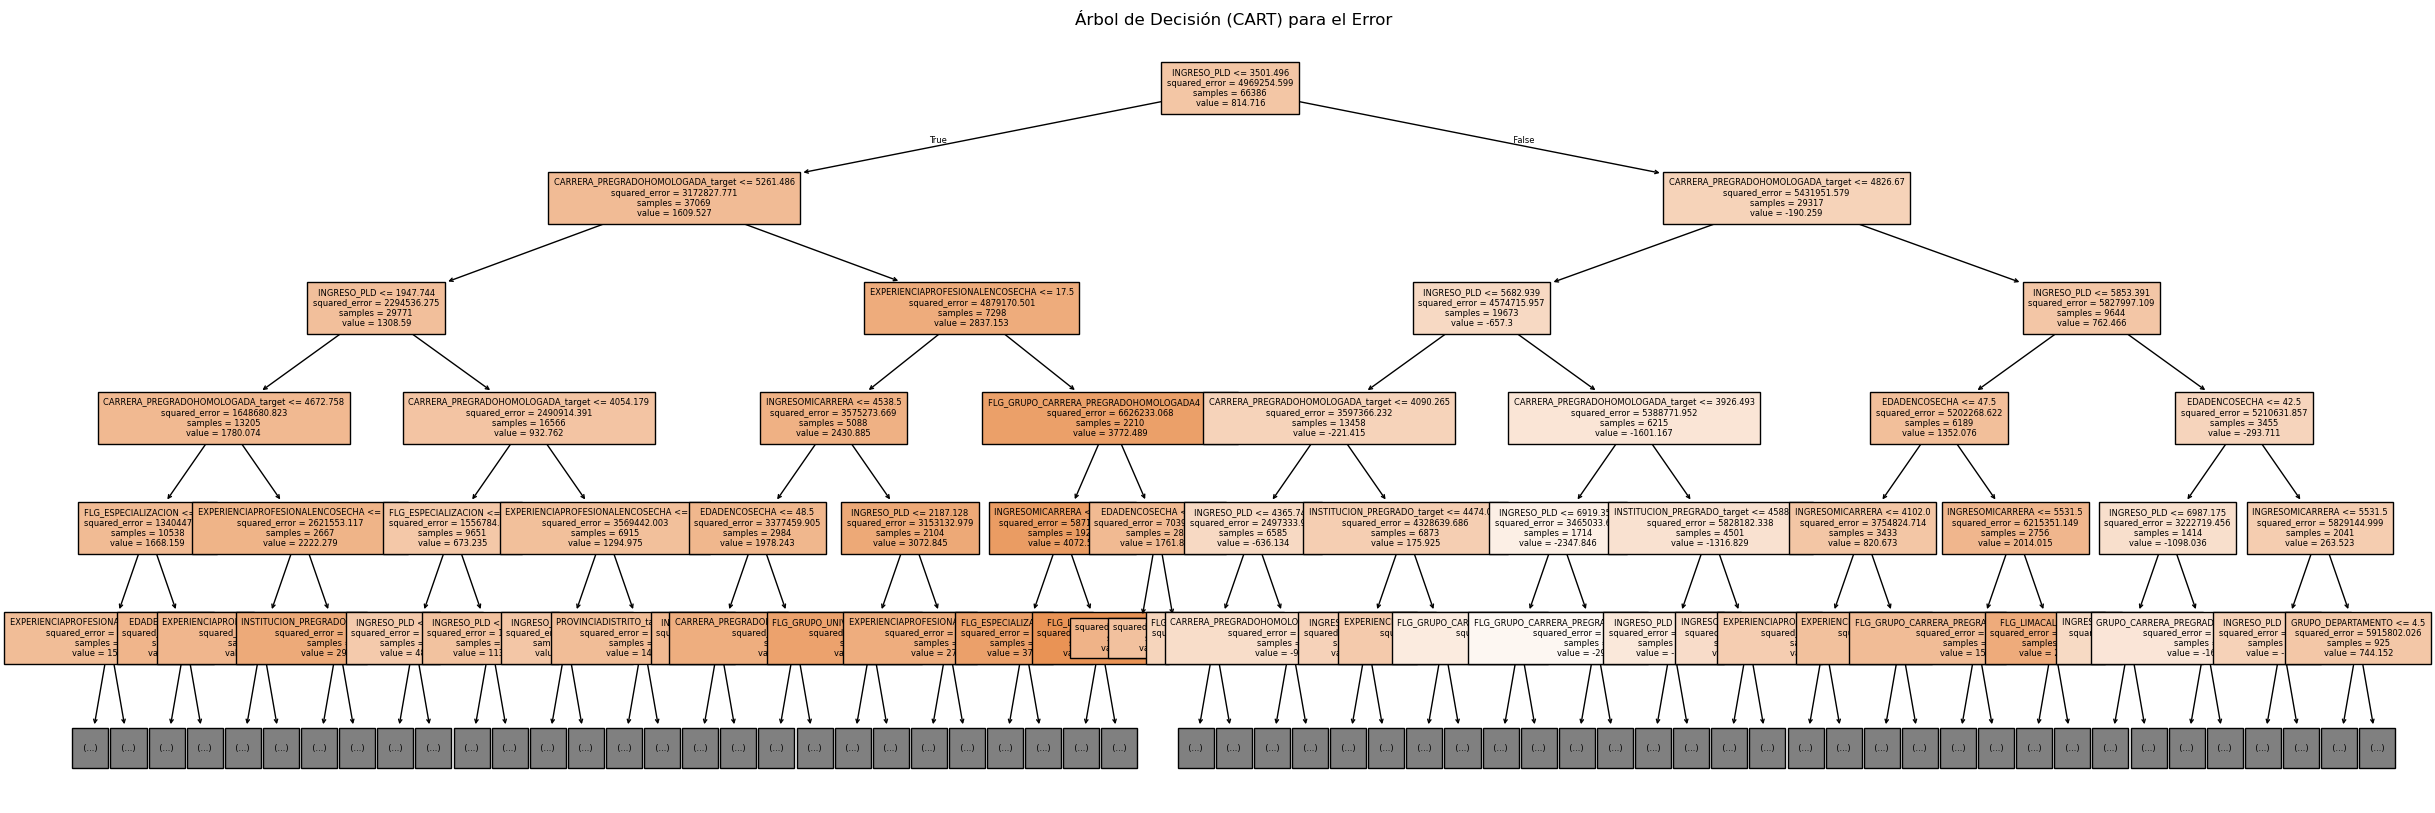

In [26]:
# 10. Visualización del árbol (opcional)
plt.figure(figsize=(30, 10))
plot_tree(cart, feature_names=variables_predictoras, filled=True, max_depth=5, fontsize=6)
plt.title("Árbol de Decisión (CART) para el Error")
plt.show()

In [27]:
#Importancia de variables de cart
importancia = cart.feature_importances_
importancia_df = pd.DataFrame({'Variable': variables_predictoras, 'Importancia': importancia})
importancia_df.sort_values(by='Importancia', ascending=False)

,Variable,Importancia
39,INGRESO_PLD,0.543613
47,CARRERA_PREGRADOHOMOLOGADA_target,0.230215
30,EXPERIENCIAPROFESIONALENCOSECHA,0.059137
38,EDADENCOSECHA,0.040034
37,INGRESOMICARRERA,0.038659
45,INSTITUCION_PREGRADO_target,0.020246
29,FLG_ESPECIALIZACION,0.019526
33,FLG_GRUPO_CARRERA_PREGRADOHOMOLOGADA4,0.009917
43,PROVINCIADISTRITO_target,0.008640
35,FLG_GRUPO_CARRERA_PREGRADOHOMOLOGADA2,0.006647


In [28]:
df_train[['INGRESONETOTARGET_PROMULT03M','INGRESO_PLD','INGRESO_ESTIMADO_FINAL']].sample(2)

,INGRESONETOTARGET_PROMULT03M,INGRESO_PLD,INGRESO_ESTIMADO_FINAL
28546,3448.354321,4886.886465,5530.577206
30689,3345.699951,3121.880790,3091.814526


# Descarga resultados

In [29]:
def agregar_rangos(df):
    """
    Agrega columnas de proporciones y rangos al DataFrame df.
    """
    df['PLDSobreTest'] = df['INGRESO_PLD'] / df['INGRESONETOTARGET_PROMULT03M']
    df['PredSobreTest'] = df['INGRESO_ESTIMADO_FINAL'] / df['INGRESONETOTARGET_PROMULT03M']

    df['Rango_PLDSobreTest'] = pd.cut(
        df['PLDSobreTest'],
        bins=[-np.inf, 0.5, 0.8, 1.2, 1.5, np.inf],
        labels=['1. <0.5', '2. 0.5 a 08', '3. 0.8 a 1.2', '4. 1.2 a 1.5', '5. >1.5']
    )
    df['Rango_PredSobreTest'] = pd.cut(
        df['PredSobreTest'],
        bins=[-np.inf, 0.5, 0.8, 1.2, 1.5, np.inf],
        labels=['1. <0.5', '2. 0.5 a 08', '3. 0.8 a 1.2', '4. 1.2 a 1.5', '5. >1.5']
    )

    df['RANGO_y_test'] = pd.cut(
        df['INGRESONETOTARGET_PROMULT03M'],
        bins=[0, 4000, 8000, 12000, np.inf],
        labels=['1. 0 a 4k', '2. 4k a 8k', '3. 8k a 12k', '4. 12k a +']
    )
    df['RANGO_INGRESO_PLD'] = pd.cut(
        df['INGRESO_PLD'],
        bins=[0, 4000, 8000, 12000, np.inf],
        labels=['1. 0 a 4k', '2. 4k a 8k', '3. 8k a 12k', '4. 12k a +']
    )
    df['RANGO_y_pred'] = pd.cut(
        df['INGRESO_ESTIMADO_FINAL'],
        bins=[0, 4000, 8000, 12000, np.inf],
        labels=['1. 0 a 4k', '2. 4k a 8k', '3. 8k a 12k', '4. 12k a +']
    )
    return df

In [30]:
resultado_train = df_train[['COD_DNI','PRESEGMENTO','SEGMENTO','cluster_kmeans','INGRESONETOTARGET_PROMULT03M','INGRESO_PLD','INGRESO_ESTIMADO_FINAL',
                            'FLG_INMUEBLE',	'NRO_INMUEBLES',	'ESTRATO',	'GRUPO_DEPARTAMENTO',	'FLG_LIMACALLAO',	'FLG_LIMAMODERNA',
                            'FLG_REPRESENTANTELEGAL',	'SALDOHIPOTECARIO_MAX',	
]].copy()
resultado_train = agregar_rangos(resultado_train)

resultado_test = df_test[['COD_DNI','PRESEGMENTO','SEGMENTO','cluster_kmeans','INGRESONETOTARGET_PROMULT03M','INGRESO_PLD','INGRESO_ESTIMADO_FINAL',
                            'FLG_INMUEBLE',	'NRO_INMUEBLES',	'ESTRATO',	'GRUPO_DEPARTAMENTO',	'FLG_LIMACALLAO',	'FLG_LIMAMODERNA',
                            'FLG_REPRESENTANTELEGAL',	'SALDOHIPOTECARIO_MAX',	
]].copy()
resultado_test = agregar_rangos(resultado_test)

resultado_oot = df_oot[['COD_DNI','PRESEGMENTO','SEGMENTO','cluster_kmeans','INGRESONETOTARGET_PROMULT03M','INGRESO_PLD','INGRESO_ESTIMADO_FINAL',
                            'FLG_INMUEBLE',	'NRO_INMUEBLES',	'ESTRATO',	'GRUPO_DEPARTAMENTO',	'FLG_LIMACALLAO',	'FLG_LIMAMODERNA',
                            'FLG_REPRESENTANTELEGAL',	'SALDOHIPOTECARIO_MAX',	
]].copy()
resultado_oot = agregar_rangos(resultado_oot)

resultado_gris = df_gris[['COD_DNI','PRESEGMENTO','SEGMENTO','cluster_kmeans','INGRESONETOTARGET_PROMULT03M','INGRESO_PLD','INGRESO_ESTIMADO_FINAL',
                            'FLG_INMUEBLE',	'NRO_INMUEBLES',	'ESTRATO',	'GRUPO_DEPARTAMENTO',	'FLG_LIMACALLAO',	'FLG_LIMAMODERNA',
                            'FLG_REPRESENTANTELEGAL',	'SALDOHIPOTECARIO_MAX',	
]].copy()
resultado_gris = agregar_rangos(resultado_gris)

In [31]:
resultado_train['tipoMuestra'] = 'train'
resultado_test['tipoMuestra'] = 'test'
resultado_oot['tipoMuestra'] = 'oot'
resultado_gris['tipoMuestra'] = 'gris'

In [32]:
resultado_final = pd.concat([resultado_train, resultado_test, resultado_oot, resultado_gris], ignore_index=True)

In [33]:
resultado_final['tipoMuestra'].value_counts()

tipoMuestra
gris     83998
train    66386
oot      60160
test     22166
Name: count, dtype: int64

In [34]:
resultado_final.head()

,COD_DNI,PRESEGMENTO,SEGMENTO,cluster_kmeans,INGRESONETOTARGET_PROMULT03M,INGRESO_PLD,INGRESO_ESTIMADO_FINAL,FLG_INMUEBLE,NRO_INMUEBLES,ESTRATO,GRUPO_DEPARTAMENTO,FLG_LIMACALLAO,FLG_LIMAMODERNA,FLG_REPRESENTANTELEGAL,SALDOHIPOTECARIO_MAX,PLDSobreTest,PredSobreTest,Rango_PLDSobreTest,Rango_PredSobreTest,RANGO_y_test,RANGO_INGRESO_PLD,RANGO_y_pred,tipoMuestra
0,17963974,2,Medio,1,6564.729980,3659.846989,4147.612490,1,2,3,3,0,0,0,0.0,0.557502,0.631802,2. 0.5 a 08,2. 0.5 a 08,2. 4k a 8k,1. 0 a 4k,2. 4k a 8k,train
1,42061653,2,Alto,2,10698.208427,2714.354357,4592.082975,0,0,5,3,0,0,0,0.0,0.253720,0.429239,1. <0.5,1. <0.5,3. 8k a 12k,1. 0 a 4k,2. 4k a 8k,train
2,40053799,2,Medio,2,958.263680,4184.127695,4692.872069,0,0,5,1,0,0,0,0.0,4.366364,4.897266,5. >1.5,5. >1.5,1. 0 a 4k,2. 4k a 8k,2. 4k a 8k,train
3,29571092,2,Medio,2,2919.204697,1714.462621,3280.926143,0,0,5,3,0,0,0,0.0,0.587305,1.123911,2. 0.5 a 08,3. 0.8 a 1.2,1. 0 a 4k,1. 0 a 4k,1. 0 a 4k,train
4,41406595,2,Medio,2,3501.396732,2192.000000,3672.395820,0,0,5,3,0,0,0,0.0,0.626036,1.048837,2. 0.5 a 08,3. 0.8 a 1.2,1. 0 a 4k,1. 0 a 4k,1. 0 a 4k,train


In [35]:
resultado_final.to_csv('02 modeloPreSegmento2_Optuna.csv', index=False)

In [36]:
import joblib
joblib.dump(cart, 'modelo_cart_preSegmento2_plusOptuna.pkl')

['modelo_cart_preSegmento2_plusOptuna.pkl']

# Gráficas

In [37]:
import pandas as pd
import numpy as np

In [38]:
def agregar_rangos(df):
    """
    Agrega columnas de proporciones y rangos al DataFrame df.
    """
    df['PLDSobreTest'] = df['INGRESO_PLD'] / df['INGRESONETOTARGET_PROMULT03M']
    df['PredSobreTest'] = df['INGRESO_ESTIMADO_FINAL'] / df['INGRESONETOTARGET_PROMULT03M']

    df['Rango_PLDSobreTest'] = pd.cut(
        df['PLDSobreTest'],
        bins=[-np.inf, 0.5, 0.8, 1.2, 1.5, np.inf],
        labels=['1. <0.5', '2. 0.5 a 08', '3. 0.8 a 1.2', '4. 1.2 a 1.5', '5. >1.5']
    )
    df['Rango_PredSobreTest'] = pd.cut(
        df['PredSobreTest'],
        bins=[-np.inf, 0.5, 0.8, 1.2, 1.5, np.inf],
        labels=['1. <0.5', '2. 0.5 a 08', '3. 0.8 a 1.2', '4. 1.2 a 1.5', '5. >1.5']
    )

    df['RANGO_y_test'] = pd.cut(
        df['INGRESONETOTARGET_PROMULT03M'],
        bins=[0, 1000, 2000, 4000, 8000, 12000, np.inf],
        labels=['1. 0 a 1k', '1. 1k a 2k', '1. 2k a 4k', '4. 4k a 8k', '4. 8k a 12k', '5. 12k a +']
    )
    df['RANGO_INGRESO_PLD'] = pd.cut(
        df['INGRESO_PLD'],
        bins=[0, 1000, 2000, 4000, 8000, 12000, np.inf],
        labels=['1. 0 a 1k', '1. 1k a 2k', '1. 2k a 4k', '4. 4k a 8k', '4. 8k a 12k', '5. 12k a +']
    )
    df['RANGO_y_pred'] = pd.cut(
        df['INGRESO_ESTIMADO_FINAL'],
        bins=[0, 1000, 2000, 4000, 8000, 12000, np.inf],
        labels=['1. 0 a 1k', '1. 1k a 2k', '1. 2k a 4k', '4. 4k a 8k', '4. 8k a 12k', '5. 12k a +']
    )
    return df
#bins=[0, 1000, 2000, 4000, 8000, 12000, np.inf],
#labels=['1. 0 a 1k', '2. 1k a 2k', '3. 2k a 4k', '4. 4k a 8k', '4. 8k a 12k', '5. 12k a +']

In [39]:
def plot_rangos(df, titulo='test'):
    """
    Genera dos gráficos de barras apiladas mostrando la distribución de los rangos
    PLDSobreTest y PredSobreTest por RANGO_y_test.
    """
    import matplotlib.pyplot as plt
    import pandas as pd

    fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
    fig.suptitle(titulo, fontsize=16)

    # Gráfico 1: Distribución usando Rango_PLDSobreTest
    tabla_crosstab1 = pd.crosstab(df['RANGO_y_test'], df['Rango_PLDSobreTest'], normalize='index', margins=True)
    ax1 = tabla_crosstab1.plot(kind='bar', stacked=True, ax=axes[0], title='Distribución de ingresos BP/Real', legend=False)

    for p in ax1.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        percentage = height * 100
        if percentage > 0:
            ax1.text(x, y, f'{percentage:.1f}%', ha='center', va='center', fontsize=9, color='white')

    ax1.set_xlabel('Rango de y_test')
    ax1.set_ylabel('Proporción')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    # Gráfico 2: Distribución usando Rango_PredSobreTest
    tabla_crosstab2 = pd.crosstab(df['RANGO_y_test'], df['Rango_PredSobreTest'], normalize='index', margins=True)
    ax2 = tabla_crosstab2.plot(kind='bar', stacked=True, ax=axes[1], title='Distribución de ingresos pred/real', legend=False)

    for p in ax2.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        percentage = height * 100
        if percentage > 0:
            ax2.text(x, y, f'{percentage:.1f}%', ha='center', va='center', fontsize=9, color='white')

    ax2.set_xlabel('Rango de y_test')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    #axes[0].legend(title='Ingreso PLD Sobre Target', bbox_to_anchor=(1, 1), loc='upper left')
    axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

In [40]:
resultado = pd.read_csv('02 modeloPreSegmento2_Optuna.csv')

In [41]:
resultado = resultado[resultado['tipoMuestra'] == 'test'].reset_index(drop=True)

In [42]:
resultado = agregar_rangos(resultado)

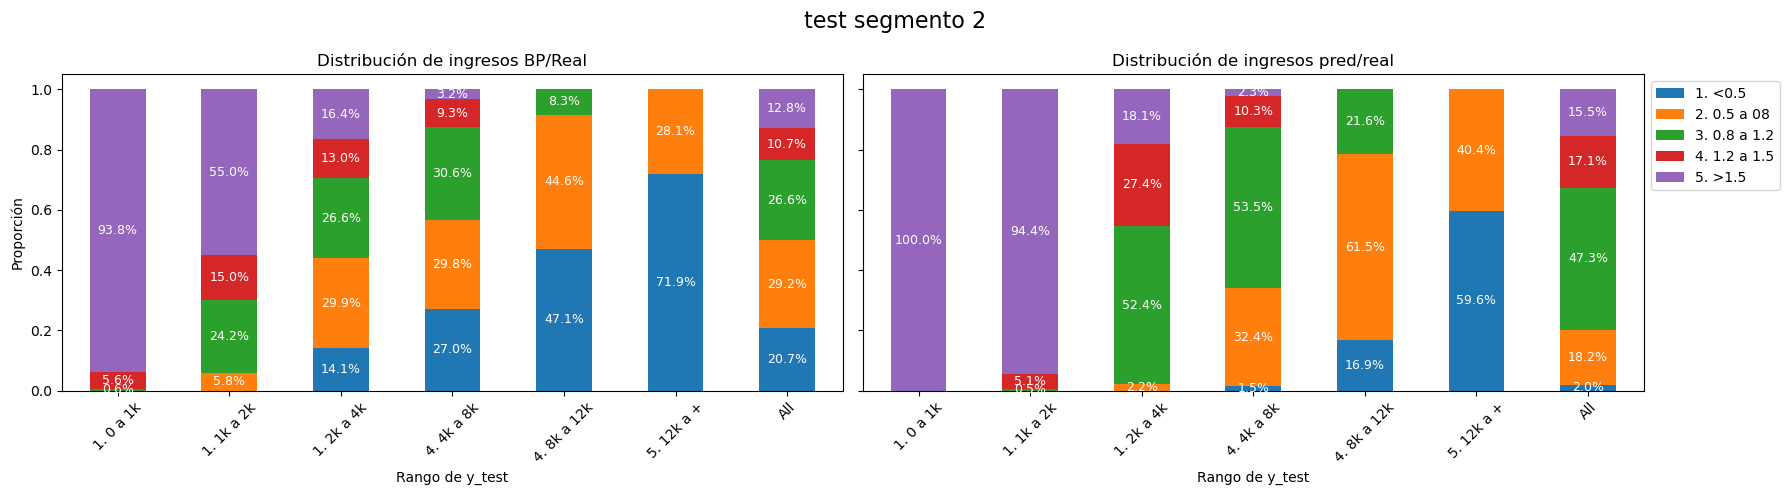

In [43]:
plot_rangos(resultado, titulo='test segmento 2')